In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
import numpy as np
import pandas as pd
df=pd.read_csv('/kaggle/input/placeemnt-data-csv/placement (2).csv')
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [24]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [26]:
x=df.iloc[:,0].values
y=df.iloc[:,1].values
x


array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [27]:
y

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98, 2.83, 3.16, 2.93,
       2.3 , 2.48, 2.71, 3.65, 3.42, 2.16, 2.24, 3.49, 3.26, 3.89, 3.08,
       2.73, 3.42, 2.87, 2.84, 2.43, 4.36, 3.33, 4.02, 2.7 , 2.54, 2.76,
       1.86, 3.58, 2.26, 3.26, 4.09, 4.62, 4.43, 3.79, 4.11, 2.61, 3.09,
       3.39, 2.74, 1.94, 3.09, 3.31, 2.19, 1.61, 2.09, 4.25, 2.92, 3.81,
       1.63, 2.89, 2.99, 2.94, 2.35, 3.34, 3.62, 4.03, 3.44, 3.28, 3.15,
       4.6 , 2.21, 3.  , 3.44, 2.2 , 2.17, 3.49, 1.53, 1.48, 2.77, 3.55,
       1.48, 2.72, 2.66, 2.14, 4.  , 3.08, 2.42, 2.79, 2.61, 2.84, 3.83,
       3.24, 4.14, 3.52, 1.37, 3.  , 3.74, 2.82, 2.19, 2.59, 3.54, 4.06,
       3.76, 2.25, 4.1 , 2.37, 1.87, 4.21, 3.33, 2.99, 2.88, 2.65, 1.73,
       3.02, 2.01, 2.3 , 2.31, 3.16, 2.6 , 3.11, 3.34, 3.12, 2.49, 2.01,
       2.48, 2.58, 2.83, 2.6 , 2.1 , 3.13, 3.89, 2.4 , 3.15, 3.18, 3.04,
       1.54, 2.42, 2.18, 2.46, 2.21, 3.4 , 3.67, 2.

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
x_train.shape

(160,)

In [30]:
x_train.shape[0]

160

In [32]:
x_train[0]

7.14

In [34]:
x_train.mean()

6.989937500000001

In [36]:
x_test[0]

8.58

#### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
import numpy as np  
lr = LinearRegression()
lr.fit(np.array(x_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))


LinearRegression()

In [38]:
x_train.reshape(1,-1)

array([[7.14, 8.93, 5.42, 5.1 , 7.77, 6.76, 6.89, 6.68, 7.91, 7.89, 8.71,
        7.95, 6.61, 6.26, 6.53, 6.42, 5.11, 6.09, 6.93, 7.04, 5.94, 6.05,
        5.83, 5.95, 9.31, 5.58, 7.88, 6.13, 7.76, 4.85, 6.19, 8.6 , 6.07,
        7.18, 5.12, 7.39, 8.25, 8.28, 7.13, 7.35, 5.66, 5.99, 8.01, 7.14,
        6.34, 6.89, 5.42, 6.47, 7.69, 7.4 , 7.28, 5.95, 7.38, 6.93, 8.99,
        7.36, 7.08, 5.38, 7.56, 8.22, 5.84, 6.78, 7.19, 7.28, 6.79, 6.12,
        6.85, 8.2 , 6.84, 7.37, 6.22, 6.61, 5.23, 7.21, 6.85, 6.19, 7.3 ,
        6.17, 5.89, 8.09, 7.11, 4.26, 6.94, 5.98, 6.71, 7.33, 9.06, 6.1 ,
        5.48, 6.1 , 7.56, 7.29, 5.84, 7.48, 7.61, 5.79, 5.61, 7.34, 9.38,
        7.91, 6.94, 7.94, 8.31, 6.96, 6.93, 7.11, 8.44, 8.18, 6.66, 8.44,
        7.12, 6.3 , 5.84, 6.98, 7.63, 5.64, 7.43, 8.87, 7.84, 5.84, 9.58,
        8.37, 7.63, 6.31, 6.5 , 8.11, 6.07, 4.73, 7.3 , 6.51, 7.28, 6.92,
        6.35, 8.62, 7.05, 9.26, 6.33, 6.22, 6.94, 5.13, 8.13, 5.9 , 9.04,
        6.06, 7.57, 8.1 , 9.16, 5.84, 

In [39]:
lr.predict(x_test.reshape(-1,1))

array([[3.89111601],
       [3.09324469],
       [2.38464568],
       [2.57434935],
       [1.6537286 ],
       [1.77647803],
       [2.07219258],
       [2.93143862],
       [3.76278706],
       [2.93701814],
       [4.09197872],
       [3.51170867],
       [2.97049525],
       [2.40138424],
       [3.18809652],
       [3.46707251],
       [1.94386362],
       [3.24389172],
       [2.97607477],
       [3.41685683],
       [2.55761079],
       [3.16577844],
       [2.85890486],
       [3.12114229],
       [3.68467378],
       [2.8700639 ],
       [3.49497011],
       [3.34432308],
       [3.91901361],
       [1.96060218],
       [3.65119666],
       [3.2104146 ],
       [3.74046898],
       [2.7863711 ],
       [2.78079158],
       [3.27178932],
       [3.52844723],
       [2.61340599],
       [2.65804215],
       [2.71383735]])

In [40]:
y_test

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [42]:
lr.coef_

array([[0.55795197]])

In [44]:
lr.intercept_

array([-0.89611192])

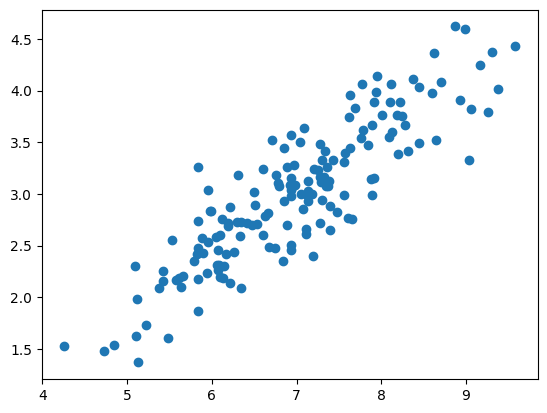

In [45]:
import matplotlib.pyplot as plt
plt.scatter(x=x_train,y=y_train)
plt.show()

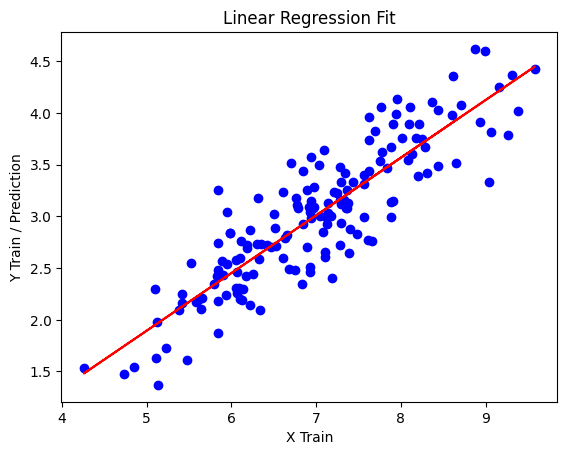

In [46]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, lr.predict(x_train.reshape(-1, 1)), color='red')

plt.xlabel("X Train")
plt.ylabel("Y Train / Prediction")
plt.title("Linear Regression Fit")
plt.show()


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = pd.read_csv('/kaggle/input/placeemnt-data-csv/placement (2).csv')


print(df.columns)


X = df[['cgpa']]         
y = df['package']          


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model1 = LinearRegression()
model1.fit(X_train, y_train)


y_pred = model1.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))


Index(['cgpa', 'package'], dtype='object')
MAE: 0.23150985393278384


In [37]:
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 0.08417638361329663


In [49]:
print("MSE:",r2_score(y_test, y_pred))
r2=r2_score(y_test,y_pred)

MSE: 0.7730984312051672


In [50]:
X_test.shape

(40, 1)

In [51]:
1-((1-r2)*(40-1)/(40-1-1))

0.7671273372895138

In [52]:
new_df1=df.copy()
new_df1['random_feature']=np.random.random(200)
new_df1=new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.341429,3.26
1,5.12,0.438247,1.98
2,7.82,0.534942,3.25
3,7.42,0.289053,3.67
4,6.94,0.679533,3.57


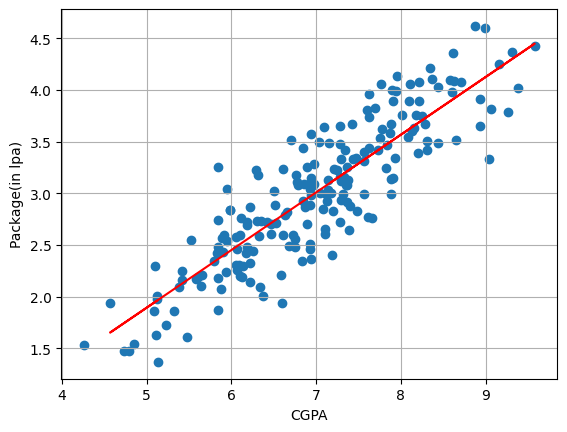

In [53]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.grid()

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=lr.predict(X_test)
y_test.values

array([2.79, 3.23, 3.26, 3.04, 3.34, 4.21, 2.94, 2.87, 2.99, 3.58, 1.63,
       2.08, 4.08, 2.21, 3.47, 3.64, 2.74, 3.08, 2.17, 2.99, 2.31, 2.35,
       3.4 , 3.08, 3.81, 2.19, 1.53, 2.89, 3.16, 2.48, 3.51, 2.98, 3.39,
       3.28, 2.73, 3.74, 2.6 , 3.13, 3.82, 3.15])

In [55]:
y_pred

array([[2.80310966],
       [3.14903989],
       [3.2104146 ],
       [2.42370232],
       [3.52844723],
       [3.76278706],
       [3.17693748],
       [2.57434935],
       [3.18809652],
       [3.49497011],
       [1.95502266],
       [2.38464568],
       [3.68467378],
       [2.78079158],
       [3.47823155],
       [3.05976757],
       [2.3623276 ],
       [3.21599412],
       [2.21726009],
       [3.322005  ],
       [2.48507704],
       [2.92027958],
       [3.32758452],
       [2.89238198],
       [3.34432308],
       [2.23399865],
       [1.48076348],
       [2.73615542],
       [3.19367604],
       [2.3623276 ],
       [3.74046898],
       [2.97607477],
       [3.67909426],
       [2.99281333],
       [2.61898551],
       [3.35548212],
       [2.50739512],
       [3.08766517],
       [4.15893296],
       [2.97607477]])

In [57]:
lr.fit(X_train,y_train)

LinearRegression()

In [60]:
y_pred=lr.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

R2 score 0.7730984312051672


In [63]:
new_df2=df.copy()
new_df2['iq']=new_df2['package']+(np.random.randint(-12,12,200)/10)
new_df2=new_df2[['cgpa','iq','package']]
new_df2.sample(5)

,cgpa,iq,package
118,7.40,3.18,2.88
69,7.30,3.64,2.94
22,6.14,2.90,2.30
33,6.35,3.63,2.73
111,5.42,3.05,2.25


Text(0, 0.5, 'Package(in lpa)')

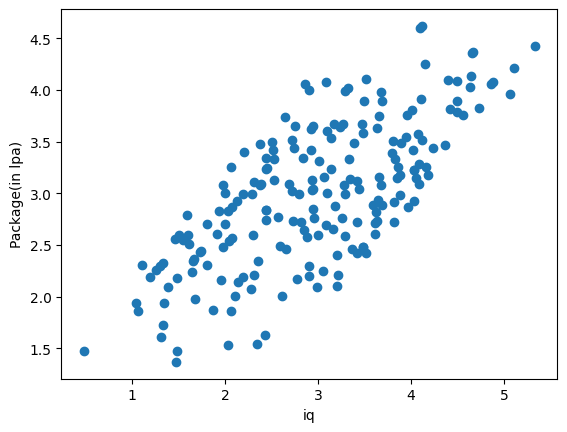

In [64]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [65]:
np.random.randint(-100,100)

-75

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x = new_df2.iloc[:, 0:2]
y = new_df2.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("r2 score", r2_score(y_test, y_pred))  # ✅ Fixed here

r2 = r2_score(y_test, y_pred)


r2 score 0.8490952792732587


In [67]:
1-((1-r2)*(40-1)/(40-1-2))

0.8409382673420834

In [68]:
lr.coef_

array([0.46162183, 0.17121662])

In [64]:
lr.intercept_

-0.6200057123233069